In [1]:
import sys
##sys.path.append('/feynman/home/dap/lceg/rp269101/.local/lib/python3.6/site-packages')
##sys.path.append('/usr/lib64/python3.6/site-packages')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd
from random import randint
from astropy.io import fits,ascii
from astropy.table import Table
from astropy.cosmology import FlatLambdaCDM
from scipy.special import erfc,erf
#from mpmath import erf
import dask
from scipy.integrate import simps
pd.options.mode.chained_assignment = None
from astropy.cosmology import FlatLambdaCDM
import functools
import os
from astropy.cosmology import z_at_value
import astropy.units as u
import random
p = 0.01  
import time
from scipy.interpolate import CubicSpline as CS
import PCF
import make_HOD

def distance(cent,pos):
    dist = np.sqrt((pos[:,0] - cent[0])**2+(pos[:,1] - cent[1])**2+(pos[:,2] - cent[2])**2)
    return dist
    
def norm(vec):
    return np.sqrt(vec[:,0]**2+vec[:,1]**2+vec[:,2]**2)

def normr(vec):
    return np.sqrt(vec[0]**2+vec[1]**2+vec[2]**2)

In [8]:
T = Table.read("/Users/rpaviot/eBOSSxDES/clustering_catalog_uchuu.fits")
df = T.to_pandas()
del df

In [17]:
#Ac = 0.00537
#As = 0.005301
#mu = 11.7
#param_ELG = np.array([Ac,As,mu])
HOD_pip = make_HOD.HOD_FIT("/Users/rpaviot/eBOSSxDES/clustering_catalog_uchuu.fits","ELG","wp_ELG_SGC_v7.dat","cov_ELG_SGC.dat")

In [ ]:
pos = np.array([0.0053,0.0053,11.5]) + (5e-4,5e-4,2e-1) * np.random.randn(32, 3)

In [ ]:
HOD_pip.dft

In [ ]:
pos

In [ ]:
HOD_pip.fit()

In [18]:
Ac = 0.00530
As = 0.00531
mu = 11.51
M0 = 10**(mu - 0.05)
M1 = 10**(mu + 0.25)
sigma = 0.08
alpha = 0.9
gamma = -1.4

#logMmin = 13.08
#logM1 = 14.00
##logM0 = 13.077
#sigmalog = 0.596
#alpha = 1.0127
#Mmin = 10**logMmin
#M1 = 10**logM1
#M0 = 10**logM0



In [5]:
probC = HOD_pip.HOD.splineC(HOD_pip.dfm.M200C)

(array([11690244.,    57777.,    34346.,    25909.,    20814.,    18751.,
           17272.,    17377.,    19274.,    61081.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

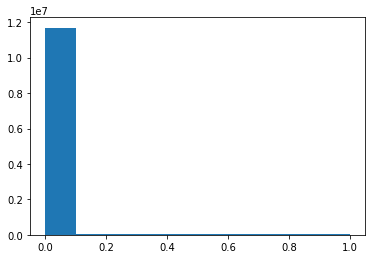

In [8]:
plt.hist(probC)

In [16]:
print(np.max(HOD_pip.dfm.M200C)/1e15)

0.944039985676288


In [14]:
np.where(probC > 1)

(array([ 1003772,  2452679,  3971148,  5094786,  5125624,  5375100,
         5526845,  7050184,  7673446, 10077009, 10647777, 11880779]),)

In [10]:
HOD_pip.dfm.M200C

0           3.427200e+11
1           7.724200e+11
2           2.622700e+11
3           6.040000e+11
4           3.466400e+11
                ...     
11962840    3.947100e+11
11962841    2.236800e+11
11962842    1.775400e+12
11962843    2.102700e+11
11962844    2.750200e+11
Name: M200C, Length: 11962845, dtype: float64

In [8]:
M200 = np.geomspace(5e11,2e15,1000)
prob = HOD_pip.HOD.splineC(M200)

In [19]:
HOD_pip.ELG_clustering([Ac,As,mu,M0,M1,sigma,alpha,gamma])

DD computation done
DR computation done


In [20]:
HOD_pip.fsat()

0.23483363706174282

In [5]:
HOD_pip.LRG_clustering([Mmin,M0,M1,sigmalog,alpha])

DD computation done
DR computation done


In [ ]:
rp,wp,wp2 = np.loadtxt("wp_ELG_SGC_v6.dat",unpack=True)


In [65]:
dm = HOD_pip.dfm
ds = HOD_pip.dfgS

RA1 = dm.RA.values.astype('float64')
RA2 = ds.RA.values.astype('float64')
cond = np.where(RA1 < 0)
RA1[cond] = RA1[cond] + 360

cond = np.where(RA2 < 0)
RA2[cond] = RA2[cond] + 360
#X = ds['Rcom']*np.cos(ds['DEC'].astype('float64')*np.pi/180)*np.cos(RA.astype('float64')*np.pi/180)
#Y = ds['Rcom']*np.cos(ds['DEC'].astype('float64')*np.pi/180)*np.sin(RA.astype('float64')*np.pi/180)
#Z = ds['Rcom']*np.sin(ds['DEC'].astype('float64')*np.pi/180)
ds['X2'] = ds['Rcom']*np.cos(ds['DEC'].astype('float64')*np.pi/180)*np.cos(RA2*np.pi/180)
dm['X2'] = dm['Rcom']*np.cos(dm['DEC'].astype('float64')*np.pi/180)*np.cos(RA1*np.pi/180)
ds['Y2'] = ds['Rcom']*np.cos(ds['DEC'].astype('float64')*np.pi/180)*np.sin(RA2*np.pi/180)
dm['Y2'] = dm['Rcom']*np.cos(dm['DEC'].astype('float64')*np.pi/180)*np.sin(RA1*np.pi/180)
ds['Z2'] = ds['Rcom']*np.sin(ds['DEC'].astype('float64')*np.pi/180)
dm['Z2'] = dm['Rcom']*np.sin(dm['DEC'].astype('float64')*np.pi/180)


In [120]:
group_sub = ds.groupby(['IDp','Rcomc','M200P'],as_index=False)
group_info = group_sub.size()
M200k = group_info['M200P'].values
IDp = group_info['IDp'].values
Rcomp = group_info['Rcomc'].values
indices = group_sub.indices
indexes = np.array(list(indices.values()),dtype="object")

In [68]:
print(M200k.size)

47915


In [127]:
distances = []
IDpp = []
for i in range(1000,2500):
    cond = np.where((dm.IDp == IDp[i]) & (dm.Rcomc == Rcomp[i]))[0]
    #print(cond)
    #print(cond)
    main = dm.iloc[cond]
    sub = ds.iloc[indexes[i]]
    cent= np.array([main.X2,main.Y2,main.Z2]).astype('float64')
    sat = (np.array([sub.X2,sub.Y2,sub.Z2]).T).astype('float64')
    #print(cent)
    #print(sat)
    s = distance(cent,sat)
    #print(s)
    distances.append(np.squeeze(s))
    IDpp.append(sub.IDp.values*np.size(sat[:,0]))


In [19]:
cond = np.where(dm.IDp == 53537844)[0]
cond2 = np.where(ds.IDp == 53537844)[0]
print(cond,cond2)


[21049289] [2979]


In [21]:
rp3,wp3 = HOD_pip.galaxy_wp_central()
rp,wp = HOD_pip.galaxy_wp()

DD computation done
DR computation done
DD computation done
DR computation done


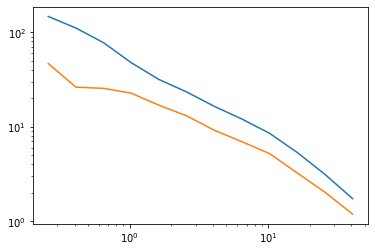

In [22]:
#plt.loglog(HOD_pip.rp,HOD_pip.wp)
#plt.loglog(rp3,wp3)
plt.loglog(rp,wp)
plt.loglog(rp3,wp3)
#plt.loglog(HOD_pip.rp,2*HOD_pip.wpdata)

In [23]:
binsfile = np.linspace(1e-5,200+1e-5,41)
r,e0,e2,e4=HOD_pip.compute_multipoles(binsfile)
r2,e02,e22,e42=HOD_pip.compute_multipoles_central(binsfile)

DD computation done


Received signal = `Interrupt: 2' (signo = 2). Aborting 


RuntimeError: RuntimeError occurred

In [27]:
HOD_pip.dfgS

,IDp,ID,RA,DEC,X,Y,Z,Rcom,Rcomc,VX,VY,VZ,M200P,M200C,z_true,z_obs,Rcom_obs
624174,1769785,1769877,8.543354,11.109373,1516.763916,227.855347,301.17688,1563.073364,1562.853516,-543.990967,611.8172,552.405945,68739999465472.0,677250007040.0,0.611299,0.609513,1559.272004
626927,1780379,1780378,7.584188,10.874339,1545.904053,205.833435,299.597107,1588.063354,1588.073853,22.764935,-596.018005,-8.485281,3367299973120.0,461750009856.0,0.62308,0.622773,1587.414635
627154,1896975,1896951,9.098548,9.118534,1563.625,250.411499,254.168945,1603.817627,1603.399292,1001.454468,146.357025,-609.808899,51995998158848.0,1164800032768.0,0.630551,0.63546,1614.146244
627245,1901567,1901570,9.871955,10.489089,1537.020874,267.477905,288.844055,1586.634277,1586.447754,39.115471,286.692352,-391.150269,9619900465152.0,885239971840.0,0.622404,0.622485,1586.806095
627226,1902665,1902663,9.757643,9.793844,1549.899414,266.534302,271.469849,1595.908691,1596.001221,15.55382,56.203545,-597.39917,7999800213504.0,494779990016.0,0.626796,0.626378,1595.026097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639622,5357009506,5357009497,-11.760325,-0.719504,2401.825684,-500.032043,-30.809753,2453.517334,2453.705322,-222.972656,-626.142639,170.532959,14699999526912.0,420220010496.0,1.093196,1.092548,2452.482508
638716,5357010848,5357010842,-12.328122,-0.585631,2396.159424,-523.679382,-25.070557,2452.844971,2453.048584,-149.337418,-343.651154,-113.455284,9768999583744.0,2576600006656.0,1.092775,1.092277,2452.049283
639563,5357011668,5357011647,-12.110862,-0.375609,2394.792725,-513.873962,-16.056946,2449.358398,2449.053711,-164.285019,-95.799553,-374.964569,5480499904512.0,628199981056.0,1.090594,1.089631,2447.818506
638121,5357017575,5357017563,-12.369751,-1.598489,2376.384277,-521.16687,-67.891785,2433.809082,2433.952637,208.140549,108.92881,266.169128,2883300098048.0,722059984896.0,1.080899,1.082096,2435.73458


In [ ]:
pi  = np.linspace(0,80,int(80/10)+1)

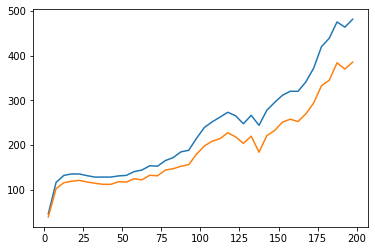

In [14]:
plt.plot(r,e0*r**2)
plt.plot(r,e02*r**2)

In [ ]:
HOD_pip.fsat()

In [ ]:
plt.plot(r,e0*r**2)
#plt.plot(r,e02*r**2)

In [ ]:
kk = HOD_pip.dfm.M200C

In [ ]:
prob = HOD_pip.HOD.splineC(kk)

In [ ]:
rng = np.random.default_rng()
array = np.ones(prob.size,dtype=int)
Nc = rng.binomial(array,prob)
cond = Nc > 0
kk2 = kk[cond]

In [ ]:
plt.hist(kk2)

In [ ]:
plt.plot(r,e0*r**2)
plt.plot(r,e02*r**2)

In [ ]:
HOD_pip.dfgC

In [ ]:
plt.plot(r,e0*r**2)

In [ ]:
HOD_pip.dfgS

In [ ]:
HOD_pip.dfg

In [ ]:
print(HOD_pip.wp)

In [ ]:
HOD_pip.fit()

In [ ]:
HOD_pip.populate(param_ELG)

In [ ]:
HOD_pip.dfg['z_obs'].values

In [ ]:
rp,wp = HOD_pip.galaxy_wp()

In [ ]:
print(rp)

In [ ]:
rp,wpx,wp2x = np.loadtxt("wp_ELG_SGC.dat",unpack=True)


In [ ]:
plt.loglog(rp,wp)
plt.loglog(rp,2*wpx)

In [ ]:
wp

In [ ]:
HOD_pip.populate(param_ELG)

In [ ]:
HOD_pip.dfg

In [ ]:
cosmo = FlatLambdaCDM(Om0=0.3089,H0=100)

In [ ]:
zc = np.arange(0.4,1.2,0.005)
Dc = cosmo.comoving_distance(zc).value
spline_z = CS(Dc,zc)
zback = z_at_value(cosmo.comoving_distance,Dc*u.Mpc)

In [ ]:
plt.plot(Dc,spline_z(Dc))
plt.plot(Dc,zback)

In [16]:
## CMASS parameter
logMmin = 13.08
logM1 = 14.00
logM0 = 13.077
sigmalog = 0.596
alpha = 1.0127
Mmin = 10**logMmin
M1 = 10**logM1
M0 = 10**logM0


#ELG parameter
Ac = 0.00537
As = 0.005301
mu = 11.515
logM0e = mu - 0.05
logM1e = mu + 0.35
M0e = 10**logM0e
M1e = 10**logM1e
sigmae = 0.08
alphae = 0.9
gammae = -1.4

def HOD_centrals(M):
    Ncen = (1./2.)*(1 + erf(np.log(M/Mmin)/sigmalog))
    return Ncen

def HOD_sattelite(M):
    if (M > M0):
        Ncen = HOD_centrals(M)
        Nsat=Ncen*((M - M0)/M1)**(alpha)
    else :
        Nsat=0.0
    return Nsat

def HOD_central_ELG(M):
    x = np.log10(M)
    if (x < mu):
        Ncen = Ac/(np.sqrt(2*np.pi)*sigmae)*np.exp(-((x - mu)**2)/(2*sigmae**2))
    else:
        Ncen= Ac/(np.sqrt(2*np.pi)*sigmae)*(M/(10**mu))**(gammae)

    return Ncen


def HOD_sattelite_ELG(M):
    if (M > M0e):
        Nsat=As*((M - M0e)/M1e)**(alphae)
    else :
        Nsat=0.0
    return Nsat





def random_sample(side):
    return np.random.uniform(side)




HOD_sattelitev = np.vectorize(HOD_sattelite)
HOD_sattelite_ELGv = np.vectorize(HOD_sattelite_ELG)
HOD_central_ELGv = np.vectorize(HOD_central_ELG)

In [ ]:
M = np.geomspace(8e10,1e15,500)
HOD_ELGc = HOD_central_ELGv(M)
HOD_ELGs = HOD_sattelite_ELGv(M)
spline_ELGc = CS(M,HOD_ELGc)
spline_ELGs = CS(M,HOD_ELGs)

        

In [ ]:
plt.loglog(M,HOD_ELGc)
plt.loglog(M,HOD_ELGs)

In [ ]:
M = np.geomspace(8e10,1e15,500)
HOD_ELGc = HOD_centrals(M)
HOD_ELGs = HOD_sattelitev(M)
spline_ELGc = CS(M,HOD_ELGc)
spline_ELGs = CS(M,HOD_ELGs)

In [ ]:
plt.loglog(M,HOD_ELGc)
plt.loglog(M,HOD_ELGs)

In [ ]:
T = Table.read("/Users/rpaviot/eBOSSxDES/clustering_catalog_uchuu.fits")
df = T.to_pandas()
df=df[(df.M200P > 2e11) &(df.z_obs > 0.6) & (df.z_obs < 1.1)]
df = df.reset_index(drop=True)

dfm = df[df.ID == df.IDp]
dft = df[df.ID != df.IDp]
dft = dft.reset_index(drop=True)
dfm = dfm.reset_index(drop=True)
#dft=dft.to_numpy()
#dfm =dfm.to_numpy()




dfgC = pd.DataFrame(columns=['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','M200P','M200C','z_true','z_obs'])
dfgS = pd.DataFrame(columns=['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','M200P','M200C','z_true','z_obs'])
rng = np.random.default_rng()
rng2 = np.random.default_rng()
rng3 = np.random.default_rng()

z = df['z_obs'].values
ra = df['RA'].values
dec = df['DEC'].values
w = np.ones(len(dec))

pip = PCF.create_random(ra,dec,z,w)
ra_r,dec_r,z_r,w_r = pip()

In [ ]:
bins = np.geomspace(0.2,60,11)

In [ ]:
dxc = np.diff(bins)[0];   xc = bins[0:-1] + 0.5*dxc


In [ ]:
np.geomspace(0.2,60,10)

In [ ]:
dxc = np.diff(bins);   xc = bins[0:-1] + 0.5*dxc


In [ ]:
dxc

In [ ]:
xc

In [ ]:

pip = PCF.randomcat(ra,dec,z,w)
ra_r,dec_r,z_r,w_r = pip()

In [ ]:
_=plt.hist(z_r,bins=200,density=True)
#_=plt.hist(z,bins=200,density=True)

In [ ]:
print(np.max(z_r))

In [ ]:
%%time

probC = spline_ELGc(dfm.M200C)
array = np.ones(probC.size,dtype=int)
Nc = rng.binomial(array,probC)

cond = Nc > 0
dfm = dfm[cond]
dfgC=pd.concat([dfgC,dfm],axis=0)


In [ ]:
dfgC.shape

In [ ]:
def cut(x,y):
    x = x[0:y]
    return x

In [ ]:
%%time
group_sub = dft.groupby(['IDp','M200P'],as_index=False)
group_info = group_sub.size()
M200P = group_info['M200P'].values
probS = HOD_sattelite_ELGv(M200P)
Ns = rng2.poisson(probS)
indices = group_sub.indices
indexes = np.array(list(indices.values()),dtype="object")
cond = np.where(Ns > 0)
M200P = M200P[cond]
Ns = Ns[cond]
indexes = indexes[cond]
shuf = list(map(np.random.shuffle, indexes))
indexes2 = np.array(list(map(cut, indexes,Ns)),dtype="object")
indextot = np.hstack(indexes2)
dfgS = pd.concat([dfgS,dft.loc[indextot]])

In [ ]:
print(probS)

In [ ]:
dfg  = pd.concat([dfgC,dfgS])

In [ ]:
dfgS.size/(dfgC.size+dfgS.size)

In [ ]:
dfgS.shape[0]/(dfgC.shape[0]+dfgS.shape[0])

In [ ]:
from scipy.constants import speed_of_light
c = speed_of_light/1e3

Dc = dfg.Rcom.values.astype('float64')
vx = dfg.VX.values.astype('float64')
vy = dfg.VY.values.astype('float64')
vz = dfg.VZ.values.astype('float64')
ra = dfg.RA.values.astype('float64')
dec = dfg.DEC.values.astype('float64')

z = z_at_value(cosmo.comoving_distance,Dc*u.Mpc)
xc = Dc*np.cos(dec*np.pi/180)*np.cos(ra*np.pi/180)
yc = Dc*np.cos(dec*np.pi/180)*np.sin(ra*np.pi/180)
zc = Dc*np.sin(dec*np.pi/180)
r = np.sqrt(xc**2 + yc**2 + zc**2)
vr = (xc*vx + yc*vy + zc*vz)/r
#Dc = Dc + vr*(1+z)/cosmo.H(z).value
dz = (1+z)*vr/c
z = z + dz

In [ ]:
ra = dfg.RA.values.astype('float64')
dec = dfg.DEC.values.astype('float64')
z = dfg.z_obs.values.astype('float64')
w = np.ones(len(z))

In [ ]:
z = z.value

In [ ]:
w = np.ones(len(z))
pip = PCF.create_random(ra,dec,z,w)
ra_r,dec_r,z_r,w_r = pip(10)

In [ ]:
print(np.where(w_r < 0))

In [ ]:
binsfile = np.arange(1.05e-5,60+1.05e-5,5)
calc = PCF.RSD_2PCF(Om0 = 0.3089)
calc.set_random(RA_r=ra_r,DEC_r=dec_r,Z_r=z_r,W_r=w_r)
calc.set_data(RA=ra,DEC=dec,Z=z,W=w)
calc.precompute_RR(binsfile)
calc.precompute_RR_rppi()

In [ ]:
r,e0,e2,e4 = calc.compute(binsfile)
rp,wp = calc.compute_wp()

In [ ]:
plt.plot(r,e0*r**2)

In [ ]:
plt.loglog(rp,wp)